# Machine Learning and Statistic Project
***

## Introduction
***

This document has been created to trains a model using Power Production dataset as part of the project for Machine Learning Project module in GMIT.

## Evaluating the Data

***

As first step we will understand the dataset[1,3].


In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sys
import scipy
import sklearn 
from sklearn import linear_model
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

In [2]:
# load dataset
data= pd.read_csv("powerproduction.csv")

In [3]:
#Check dimention - 2 variables speed and power and 500 data for each
print (data.shape)

(500, 2)


In [4]:
# To see head to evaluate if the information is good
print(data.head(5))

   speed  power
0  0.000    0.0
1  0.125    0.0
2  0.150    0.0
3  0.225    0.0
4  0.275    0.0


In [5]:
# In the tail we noticed data have zero power with the max speed given, probably there is information missed
print(data.tail(5))

      speed  power
495  24.775    0.0
496  24.850    0.0
497  24.875    0.0
498  24.950    0.0
499  25.000    0.0


In [6]:
# MAx Speed 25 and max power is 113.56 
print(data.describe())

            speed       power
count  500.000000  500.000000
mean    12.590398   48.014584
std      7.224991   41.614572
min      0.000000    0.000000
25%      6.324750    5.288000
50%     12.550500   41.645500
75%     18.775250   93.537000
max     25.000000  113.556000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000196527B5580>,
      dtype=object)

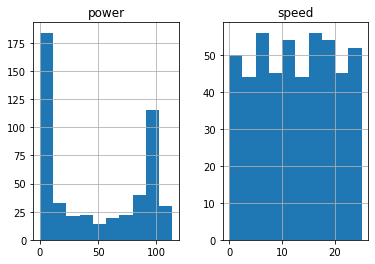

In [7]:
# Histogram to get an idea of the distribution
data.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019652F337F0>,
      dtype=object)

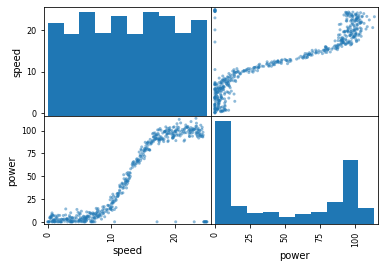

In [8]:
# Plot to spot structured relationships between input variables.
scatter_matrix(data)

## Model and Training
***

### Linear Regression 

Taking for this project Linear and Polinomial Regression as models
***

In [9]:
# Let’s select some features to explore more  :
data = data[["speed","power"]]

# Generating training and testing data from our data:
# We are using 80% data for training.

train = data[:(int((len(data)*0.8)))]
test = data[(int((len(data)*0.8))):]

In [10]:
# Training model 
regr = linear_model.LinearRegression()

train_x = np.array(train[["speed"]])
train_y = np.array(train[["power"]])

regr.fit(train_x,train_y)

# Slope
print ("Coefficient:", regr.coef_)
# Intercept
print ("Intercept:", regr.intercept_)

Coefficient: [[6.0025154]]
Intercept: [-22.55082848]


Text(0, 0.5, 'Power')

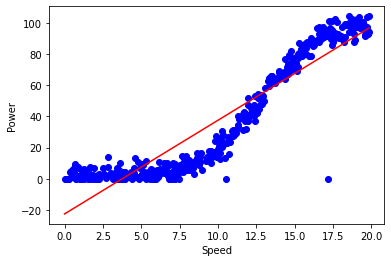

In [11]:
# Plotting the best fit line
plt.scatter(train["speed"], train["power"], color="blue")
plt.plot(train_x, regr.coef_*train_x + regr.intercept_, "-r")
plt.xlabel("Speed")
plt.ylabel("Power")

In [12]:
# Predicting values:
# Function for predicting future values :
def get_regression_predictions(input_features,intercept,slope):
 predicted_values = input_features*slope + intercept
 return predicted_values

In [13]:
# Predicting power:
wspeed = 0.325
epower = get_regression_predictions(wspeed,regr.intercept_[0],regr.coef_[0][0])
print ("Estimated Power :", epower)

Estimated Power : -20.600010977767905


In [14]:
# Checking various accuracy:
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

test_x = np.array(test[["speed"]])
test_y = np.array(test[["power"]])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y, test_y_) )


Mean absolute error: 25.91
Residual sum of squares (MSE): 2020.48
R2-score: -0.90


### Polynomial Regression
***

Coefficients:  [[ 0.         -9.17939315  1.41018425 -0.03617542]]
Intercept:  [13.42618494]
Mean absolute error: 19.22
Residual sum of squares (MSE): 1327.95
R2-score: -0.25


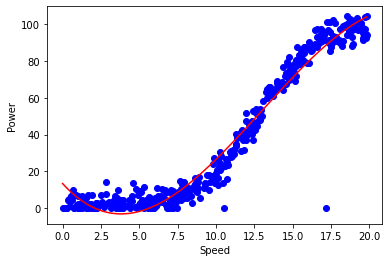

In [15]:
from sklearn.preprocessing import PolynomialFeatures

# Training the model [2,4,5]

poly3 = PolynomialFeatures(degree=3)

train_x = np.array(train[["speed"]])
train_y = np.array(train[["power"]])
train_x_poly3 = poly3.fit_transform(train_x)
clf3 = linear_model.LinearRegression()
train_y3_ = clf3.fit(train_x_poly3, train_y)

#The coefficients
print ('Coefficients: ', clf3.coef_)
print ('Intercept: ',clf3.intercept_)

# Plotting the best fit line
plt.scatter(train.speed, train.power,  color='blue')
XX = np.array(train[["speed"]])
yy = clf3.intercept_[0]+ clf3.coef_[0][1]*XX + clf3.coef_[0][2]*np.power(XX, 2) + clf3.coef_[0][3]*np.power(XX, 3)
plt.plot(XX, yy, '-r' )
plt.xlabel("Speed")
plt.ylabel("Power")

test_x_poly3 = poly3.fit_transform(test_x)
test_y3_ = clf3.predict(test_x_poly3)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y3_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y3_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y, test_y3_) )

In [16]:
def prev(XX):
 predicted_v = clf3.intercept_[0]+ clf3.coef_[0][1]*XX + clf3.coef_[0][2]*np.power(XX, 2) + clf3.coef_[0][3]*np.power(XX, 3)
 return predicted_v

In [17]:
wspeed = np.random.rand()
epower = prev(wspeed)
print(f'For a random speed: {wspeed}, the power predicted is: {epower}.')

For a random speed: 0.4720084397044647, the power predicted is: 9.403807428977226.


### Comparison between Linear and Polynomial Regression
***

- We can see in the plots that polynomial regression clearly fits better the data compared with linear regression, the results below demostrate this as well.  

- R-squared is a statistical measure of how close the data are to the fitted regression line. In general, the higher the R-squared, the better the model fits your data. For linear regression the result was -0.90 and for polynomial -0.25, both results show that these models are not close to the fitted regression line but as the polynomial result is slightly higher we can understand the model fits better the data. 

- Mean absolute error is a measure of errors between paired observations expressing the same phenomenon. We can see for linear regression is 25.91 and polynomial 19.22 

- The residual sum of squares is the sum of the squared errors, it is a measure of the discrepancy between the data and an estimation model and for linear regression the result was 2020.48 and polynomial regression 1327.95 showing the big discrepancy. 



## References
***

1. Machine Learning Mastery - Machine Learning in Python - https://machinelearningmastery.com/machine-learning-in-python-step-by-step/

2. Github - Python Polynomial Regression - https://github.com/anandprabhakar0507/Python-polynomial-regression/blob/master/ML0101EN-Reg-Polynomial-Regression-Co2-py-v1.py

3. Medium - Machine Learning - https://medium.com/towards-artificial-intelligence/machine-learning-algorithms-for-beginners-with-python-code-examples-ml-19c6afd60daa

4. Github - Polynomial Regression - https://github.com/anandprabhakar0507/Python-polynomial-regression/blob/master/ML0101EN-Reg-Polynomial-Regression-Co2-py-v1.py
    
5. Statworkx - Machine Learning - https://www.statworx.com/ch/blog/how-to-build-a-machine-learning-api-with-python-and-flask/